In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/hotel-booking-demand/hotel_bookings.csv")

In [4]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df['children'] = df['children'].fillna(0)
df['agent'] = df['agent'].astype('object').fillna('Unknown')
df['company'] = df['company'].astype('object').fillna('Unknown')

In [6]:
df = df[df['adults'] > 0]

In [7]:
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + "-" +
    df['arrival_date_month'].astype(str) + "-" +
    df['arrival_date_day_of_month'].astype(str)
)

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df['total_stay_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

df['total_guests'] = df['adults'] + df['children'] + df['babies']

df['room_changed'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)

bins = [0, 3, 14, 30, 90, 365]
labels = ['0-3', '4-14', '15-30', '31-90', '90+']
df['lead_time_group'] = pd.cut(df['lead_time'], bins=bins, labels=labels)

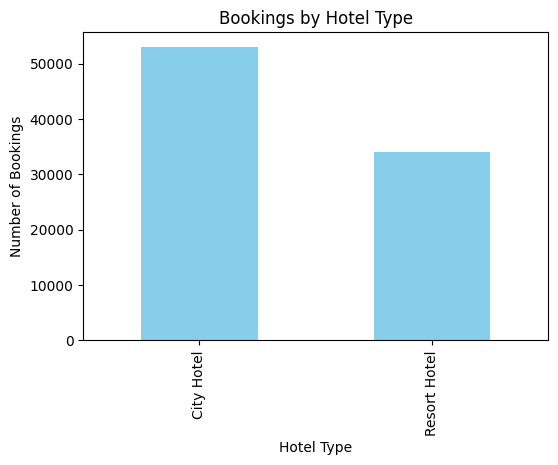

In [10]:
plt.figure(figsize=(6,4))
df['hotel'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Bookings by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Number of Bookings")
plt.show()

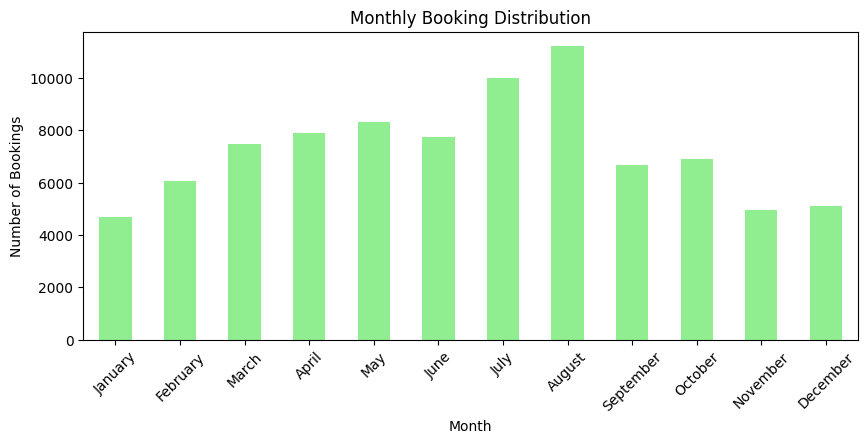

In [11]:
plt.figure(figsize=(10,4))
df['arrival_date_month'].value_counts().reindex([
    'January','February','March','April','May','June','July','August',
    'September','October','November','December']).plot(kind='bar', color='lightgreen')
plt.title("Monthly Booking Distribution")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()

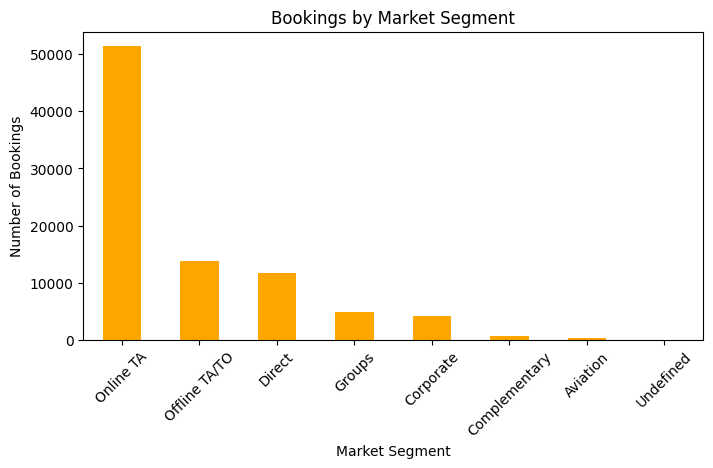

In [12]:
plt.figure(figsize=(8,4))
df['market_segment'].value_counts().plot(kind='bar', color='orange')
plt.title("Bookings by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_47/3581974737.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_cancel = df.groupby('lead_time_group')['is_canceled'].mean() * 100


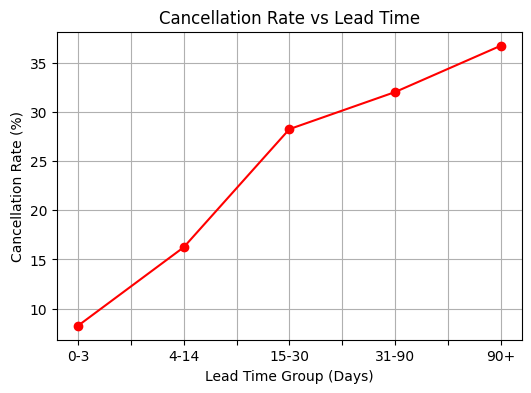

In [13]:
lead_cancel = df.groupby('lead_time_group')['is_canceled'].mean() * 100
plt.figure(figsize=(6,4))
lead_cancel.plot(marker='o', linestyle='-', color='red')
plt.title("Cancellation Rate vs Lead Time")
plt.xlabel("Lead Time Group (Days)")
plt.ylabel("Cancellation Rate (%)")
plt.grid(True)
plt.show()

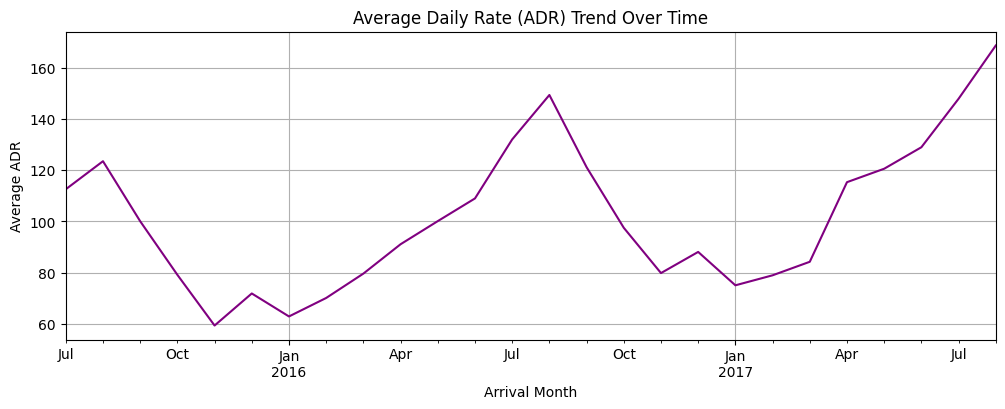

In [14]:
plt.figure(figsize=(12,4))
df.groupby(df['arrival_date'].dt.to_period('M'))['adr'].mean().plot(color='purple')
plt.title("Average Daily Rate (ADR) Trend Over Time")
plt.xlabel("Arrival Month")
plt.ylabel("Average ADR")
plt.grid(True)
plt.show()

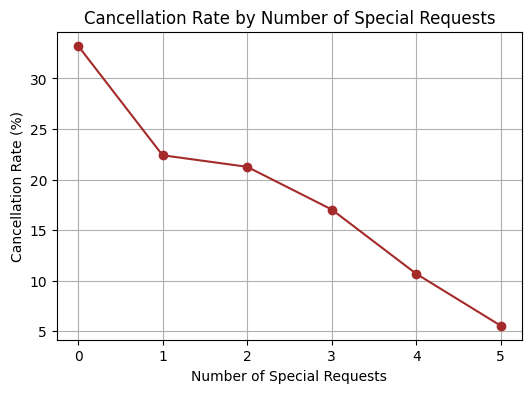

In [15]:
request_cancel = df.groupby('total_of_special_requests')['is_canceled'].mean() * 100
plt.figure(figsize=(6,4))
request_cancel.plot(marker='o', linestyle='-', color='brown')
plt.title("Cancellation Rate by Number of Special Requests")
plt.xlabel("Number of Special Requests")
plt.ylabel("Cancellation Rate (%)")
plt.grid(True)
plt.show()

***Basic Level Questions***

**Q1 What is the average lead time for bookings?**

In [16]:
avg_lead_time = df['lead_time'].mean()
avg_lead_time

79.86237372286263

**Q2 What is the distribution of bookings by hotel type?**

In [17]:
df['hotel'].value_counts()

hotel
City Hotel      53055
Resort Hotel    33956
Name: count, dtype: int64

**Q3 How many bookings were canceled?**

In [18]:
total_cancellations = df['is_canceled'].sum()
total_cancellations

23928

**Q4 What is the most common arrival month for bookings?**

In [19]:
common_month = df['arrival_date_month'].mode()[0]
common_month

'August'

**Q5 What is the average number of special requests per booking?**

In [20]:
avg_requests = df['total_of_special_requests'].mean()
avg_requests

0.6981186286791325

**Q6 Which country has the highest number of bookings?**

In [21]:
top_country = df['country'].value_counts().idxmax()
top_country

'PRT'

**Q7 What is the average daily rate (ADR) for each hotel type?**

In [22]:
avg_adr_hotel = df.groupby('hotel')['adr'].mean()
avg_adr_hotel

hotel
City Hotel      111.397239
Resort Hotel     99.059517
Name: adr, dtype: float64

**Q8 What percentage of guests required car parking spaces?**

In [23]:
parking_percentage = (df['required_car_parking_spaces'] > 0).mean() * 100
parking_percentage

8.394340945397708

**Q9What is the average stay duration in week nights and weekend nights?**

In [24]:
avg_week = df['stays_in_week_nights'].mean()
avg_weekend = df['stays_in_weekend_nights'].mean()
avg_week, avg_weekend

(2.6240130558205284, 1.0046430911034236)

**Q10 How many bookings were made through travel agents?**

In [25]:
bookings_through_agents = df['agent'].notna().sum()
bookings_through_agents

87011

***Medium Level Questions***

**Q1 What is the cancellation rate for each hotel type?**

In [26]:
cancellation_rate_hotel = df.groupby('hotel')['is_canceled'].mean() * 100
cancellation_rate_hotel

hotel
City Hotel      30.070681
Resort Hotel    23.483331
Name: is_canceled, dtype: float64

**Q2 What is the average ADR per market segment?**

In [27]:
avg_adr_market = df.groupby('market_segment')['adr'].mean()
avg_adr_market

market_segment
Aviation         100.613628
Complementary      3.102573
Corporate         68.344298
Direct           116.950454
Groups            75.167800
Offline TA/TO     81.962400
Online TA        118.401641
Undefined         15.000000
Name: adr, dtype: float64

**Q3 What is the relationship between lead time and cancellation rate?**

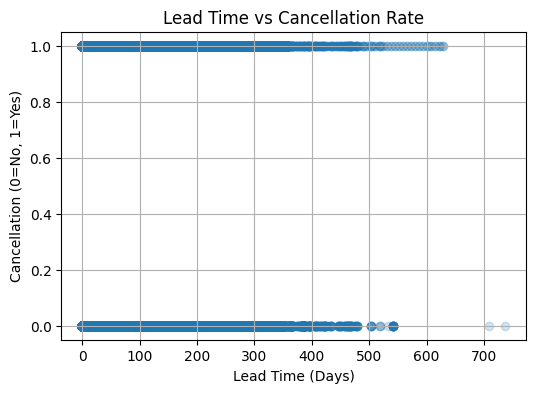

In [28]:
plt.figure(figsize=(6,4))
plt.scatter(df['lead_time'], df['is_canceled'], alpha=0.2)
plt.title("Lead Time vs Cancellation Rate")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Cancellation (0=No, 1=Yes)")
plt.grid(True)
plt.show()

**Q4 Which distribution channel has the highest number of bookings?**

In [29]:
top_channel = df['distribution_channel'].value_counts()
top_channel

distribution_channel
TA/TO        68842
Direct       12921
Corporate     5062
GDS            181
Undefined        5
Name: count, dtype: int64

**Q5 What is the average number of previous cancellations by hotel type?**

In [30]:
prev_cancel_hotel = df.groupby('hotel')['previous_cancellations'].mean()
prev_cancel_hotel

hotel
City Hotel      0.035868
Resort Hotel    0.021999
Name: previous_cancellations, dtype: float64

**Q6 What is the trend of ADR over the years?**

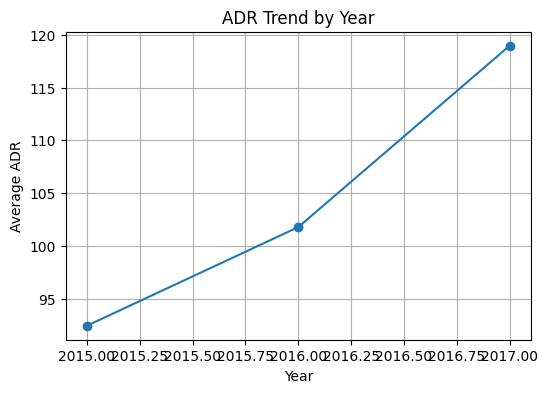

In [31]:
plt.figure(figsize=(6,4))
df.groupby('arrival_date_year')['adr'].mean().plot(marker='o')
plt.title("ADR Trend by Year")
plt.xlabel("Year")
plt.ylabel("Average ADR")
plt.grid(True)
plt.show()

**Q7 Which month has the highest revenue?**

In [32]:
monthly_revenue = df.groupby('arrival_date_month')['adr'].sum().sort_values(ascending=False)
monthly_revenue

arrival_date_month
August       1695501.49
July         1360550.58
June          928582.32
May           927006.56
April         817396.42
September     748469.60
October       623786.13
March         611808.54
February      454150.09
December      416324.42
November      362418.80
January       327850.52
Name: adr, dtype: float64

**Q8 What is the impact of special requests on ADR?**

In [33]:
special_request_adr = df.groupby('total_of_special_requests')['adr'].mean()
special_request_adr

total_of_special_requests
0     99.909489
1    109.907270
2    118.812596
3    125.417265
4    131.075472
5    129.980000
Name: adr, dtype: float64

**Q9 What is the average stay duration for repeated guests versus new guests?**

In [34]:
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
stay_comparison = df.groupby('is_repeated_guest')['total_stay'].mean()
stay_comparison

is_repeated_guest
0    3.696036
1    1.952721
Name: total_stay, dtype: float64

**Q10 Which room type has the highest number of bookings?**

In [35]:
top_room_type = df['reserved_room_type'].value_counts()
top_room_type

reserved_room_type
A    56427
D    17375
E     6035
F     2818
G     2049
C      914
B      791
H      596
L        6
Name: count, dtype: int64

***Advanced Level Questions***

**Q1 What factors significantly impact the cancellation rate?**

In [36]:
import statsmodels.api as sm

features = ['lead_time', 'booking_changes', 'total_of_special_requests', 'is_repeated_guest', 'adr']
X = df[features]
y = df['is_canceled']

# Adding constant
X = sm.add_constant(X)

log_model = sm.Logit(y, X).fit()
print(log_model.summary())

Optimization terminated successfully.
         Current function value: 0.542328
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:                87011
Model:                          Logit   Df Residuals:                    87005
Method:                           MLE   Df Model:                            5
Date:                Thu, 27 Nov 2025   Pseudo R-squ.:                 0.07794
Time:                        10:25:52   Log-Likelihood:                -47188.
converged:                       True   LL-Null:                       -51177.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.7095      0.021    -79.601      0.000      -1.

**Q2 How does the ADR vary with the number of adults, children, and babies?**

In [37]:
features = ['adults', 'children', 'babies']
X = df[features]
y = df['adr']

X = sm.add_constant(X)
reg_model = sm.OLS(y, X).fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    adr   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     5731.
Date:                Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                        10:25:52   Log-Likelihood:            -4.6417e+05
No. Observations:               87011   AIC:                         9.283e+05
Df Residuals:                   87007   BIC:                         9.284e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.6181      0.548    115.989      0.0

**Q3 What is the impact of booking changes on guest satisfaction as indicated by special requests?**

In [38]:
corr = df['booking_changes'].corr(df['total_of_special_requests'])
corr

0.01836902773515722

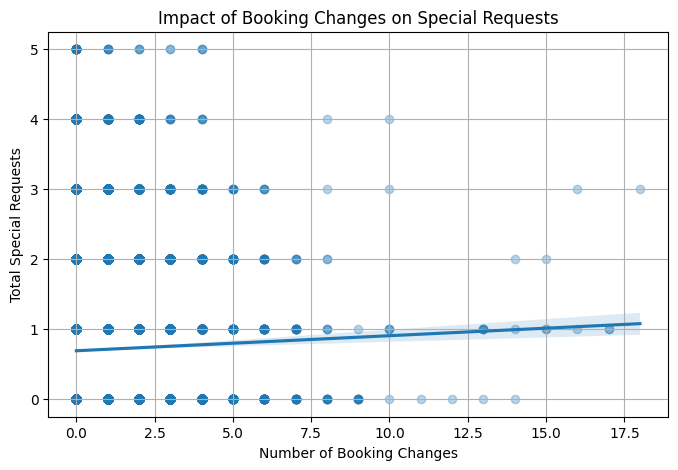

In [39]:
plt.figure(figsize=(8,5))
sns.regplot(x='booking_changes', y='total_of_special_requests', data=df, scatter_kws={'alpha':0.3})

plt.title('Impact of Booking Changes on Special Requests')
plt.xlabel('Number of Booking Changes')
plt.ylabel('Total Special Requests')
plt.grid(True)
plt.show()

**Q4 What is the seasonal impact on booking cancellations?**

In [40]:
season_cancel = df.groupby('arrival_date_month')['is_canceled'].mean() * 100
season_cancel

arrival_date_month
April        30.435334
August       32.212310
December     26.881509
February     23.182193
January      22.134133
July         31.834982
June         30.342156
March        24.340961
May          29.235202
November     21.079122
October      23.750905
September    24.494079
Name: is_canceled, dtype: float64

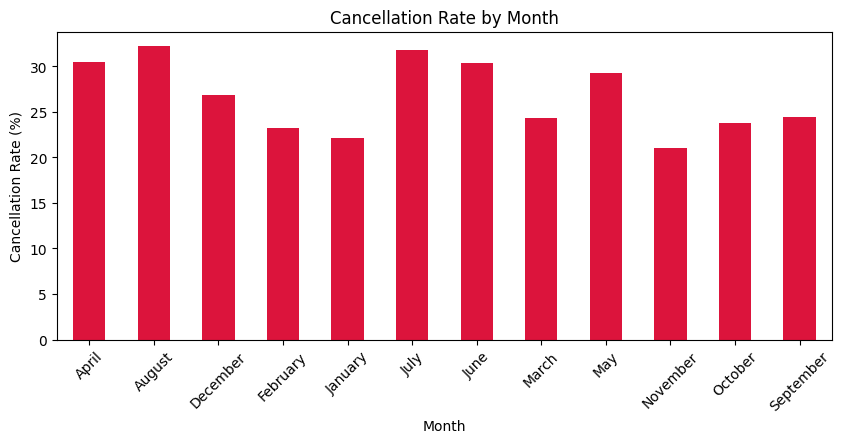

In [41]:
plt.figure(figsize=(10,4))
season_cancel.plot(kind='bar', color='crimson')
plt.title("Cancellation Rate by Month")
plt.xlabel("Month")
plt.ylabel("Cancellation Rate (%)")
plt.xticks(rotation=45)
plt.show()

**Q5 How does the booking lead time distribution vary between different market segments?**

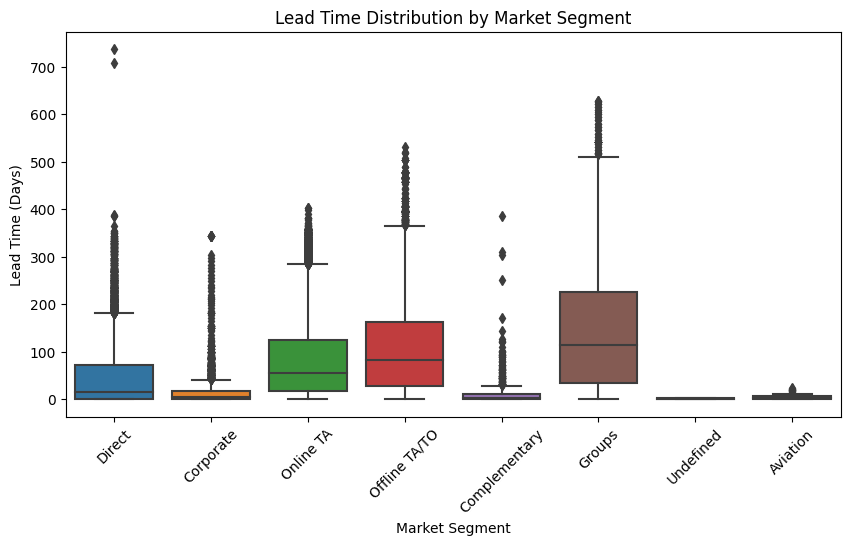

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x='market_segment', y='lead_time', data=df)
plt.title("Lead Time Distribution by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Lead Time (Days)")
plt.xticks(rotation=45)
plt.show()

***Conclusion***

The analysis of the Hotel Harmony dataset reveals critical patterns that directly influence booking demand, cancellation behavior, pricing decisions, and guest satisfaction. City Hotels attract more bookings due to location convenience, while Resort Hotels generate higher revenue per stay, especially during peak seasons. Seasonal trends show strong demand variations, emphasizing the need for dynamic pricing, seasonal promotions, and capacity planning.

Cancellation behavior is strongly driven by long lead times, booking changes, and low deposit types, highlighting that guests who book far in advance are more likely to cancel. Implementing partial payment or stricter cancellation policies for high-lead bookings can significantly reduce last-minute losses. The study also finds that the Average Daily Rate (ADR) fluctuates by season and guest composition, suggesting pricing optimization based on market segment and family-focused booking trends.

Furthermore, guests who request more special services generally show lower cancellation tendencies, indicating that customization improves commitment and satisfaction. Encouraging personalized services can therefore enhance loyalty and reduce booking churn.